#### Star classification with k-means algorithm

This notebook aims to classify a image with stars using **k-means** algorithm.

#### Required Modules

**cv2 (OpenCV)->** Computer vision and image processing tasks. OpenCV provides functions and algorithms to perform tasks like image and video manipulation, object detection, facial recognition and more.

**numpy ->** Used for Scientific computing with Python. It provides support for large, multi-dimensional arrays and matrice. 

**sklearn ->** Machine learning library for Python. It provides tools for data mining and data analysis, such as various algorithms for classification, regression, clustering, dimensionality reduction, and model selection.

**matplotlib ->** Matplotlib is a plotting library for Python that provides a MATLAB-like interface for creating static, interactive, and animated visualizations. It allows you to generate plots, histograms, bar charts, scatterplots and more...

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  

#### Loading the choosen image

In [4]:
stars_picture = cv2.imread("./Images/01 - stars.png")


#### Converting image from BGR to RGB

Converting this image from BGR to RGB doesn't affect the k-means algorithm's ability to analyze the image. 

K-means algorithm relies on the numerical values representing each pixel's color, which remain unchanged whether the image is in BGR or RGB format.

`Note: It's important know that the color representation can impact how we (humans) perceive the results.`

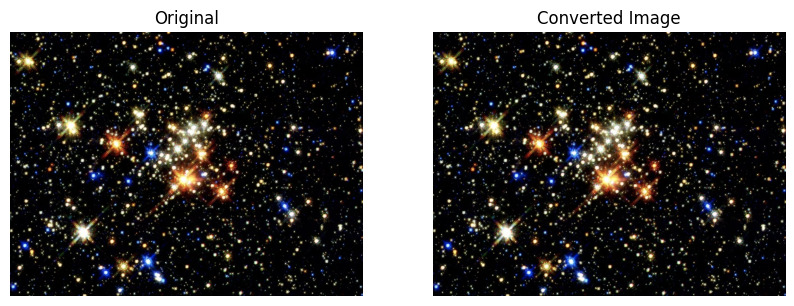

In [5]:
stars_picture_rgb = cv2.cvtColor(stars_picture, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

# Before convert it to RGB
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(stars_picture, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

# After convert it to RGB
plt.subplot(1, 2, 2)
plt.imshow(stars_picture_rgb)
plt.title("Converted Image")
plt.axis("off")

plt.show()

#### Converting the image to a one-dimensional array of pixels

Reshaping the image array into a two-dimensional array where each row represents a pixel and each column represents a color channel (Red, Green, and Blue)

**Reshape** operation is performed before applying the K-means algorithm. K-means clustering requires input data to be in the form of a 2D array where each row represents a data point (in this case, that would be a pixel), and each column represents a feature (for this cause, the color channels).

In [7]:
reshaping_image = stars_picture_rgb.reshape(-1, 3)


reshaping_image

array([[10, 10,  9],
       [10, 10,  9],
       [24, 25, 21],
       ...,
       [ 9, 27, 80],
       [12, 26, 74],
       [12, 26, 74]], dtype=uint8)

#### Applying K-Means to segment image pixels into 6 clusters

**n_clusters:** specifies the number of clusters that the algorithm should divide the data into.

**fit():** This method applies k-means algorithm to the data, clustering the data points into the specified number of clusters (n_clusters). Now kmeans object will contain information about the clusters, such as the cluster centers (centroids) and the labels indicating which cluster each data point belongs to.

In [8]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(reshaping_image)

KMeans(n_clusters=6)

#### Assigning cluster labels to pixels and reshaping the image

**labels:** this attribute of kmeans object contains the cluster labels assigned to each data point during the clustering process.

**segmented_image**: image.shape[0] represents the height of the image, and image.shape[1] represents the width of the image. 

By reshaping the labels array to have the same height and width as the original image, this ensure that each pixel in the segmented image corresponds to a cluster label

After this line, segmented_image will be a 2D array where each value represents the cluster label assigned to the corresponding pixel in the original image. This segmented image can be further analyzed or visualized to understand the clustering results.

In [9]:
labels = kmeans.labels_
segmented_image = labels.reshape(stars_picture_rgb.shape[0], stars_picture_rgb.shape[1])

#### Viewing the results


**plt.figure:** Creates a new figure for plotting with a figure size of 10 inches by 8 inches.

**plt.imshow:** Displays the segmented image using the imshow() function from Matplotlib. 

The segmented_image is the 2D array representing the segmented image generated by k-means clustering. The cmap="viridis" specifies the colormap to be used for displaying the image. viridis colormap is used, which is a perceptually uniform colormap that works well for displaying numerical data.

**plt.title**: Shows the title of the plot to Star Classification.

**plt.axis("off")**: Turns off the axis ticks and labels to create a cleaner plot without axes.

**plt.colorbar(label="Cluster"):** This line adds a colorbar to the plot, which is a scale showing the mapping between cluster labels and colors. 

**plt.show():** Displays the plot.

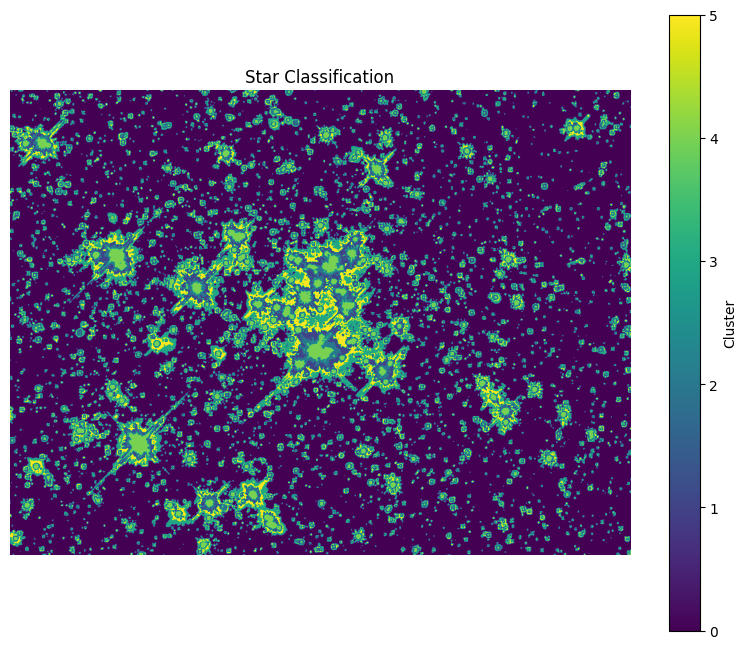

In [12]:
plt.figure(figsize=(10, 8))
plt.imshow(segmented_image, cmap='viridis')
plt.title("Star Classification")
plt.axis("off")
plt.colorbar(label="Cluster")
plt.show()